# spectral_centroid
* spectral_centroid([y, sr, S, n_fft, …])
*  librosa.feature.spectral_centroid(y=None, sr=22050, S=None, n_fft=2048, hop_length=512, freq=None, win_length=None, window='hann', center=True, pad_mode='reflect')
* 스펙트럼의 중심을 계산한다. 각 프레임이 정규화되고 주파수 bin 에 대한 분포로 처리되어 프레임 당 평균(=중심)이 추출된다.

    y : np.ndarray [shape=(n,)] or None | 소리가 떨리는 세기(진폭)를 시간 순서대로 나열한 것    
    sr : number > 0 [scalar] | 샘플링레이트,  1초당 샘플의 개수, 단위 Hz 또는 kHz    
    S : np.ndarray [shape=(d, t)] or None | spectrogram 진폭    
    n_fft : int > 0 [scalar] | FFT window size    
    hop_length : int > 0 [scalar] | STFT 컬럼 간의 간격    
    freq : None or np.ndarray [shape=(d,) or shape=(d, t)] | 중심 주파수, None일 때 중심 주파수가 사용된다.    
    win_length : int <= n_fft [scalar] | 윈도우 사이즈, n_fft와 매칭된다.    
    window : string, tuple, number, function, or np.ndarray [shape=(n_fft,)] |     
    center : boolean | True이면 y가 패딩되어서 y[t * hop_length] 로 센터가 맞춰진다. Fasle라고 하면 t가 패딩되어서 y[t * hop_length] 로 센터가 맞춰진다.    
    pad_mode : string | center=True라면 패딩모드가 적용된다. 그냥 디폴트라면 STFT가 패딩으로 사용된다.       

In [5]:
# 영리's voice
import librosa
y, sr = librosa.load('../../nmb_data/teamvoice/testvoice_F2.wav')

----------------------

# 디폴트

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram_F2')]

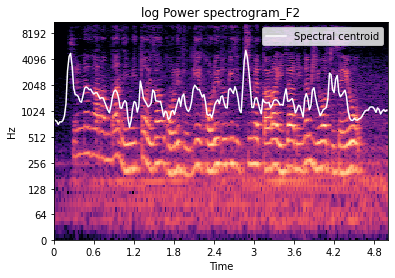

In [44]:
# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
cent1 = librosa.feature.spectral_centroid(y=y, sr=sr)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)

# [3] bin center frequencies
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
cent3 = librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)

# Graph

times = librosa.times_like(cent1)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent1.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram_F2')

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram')]

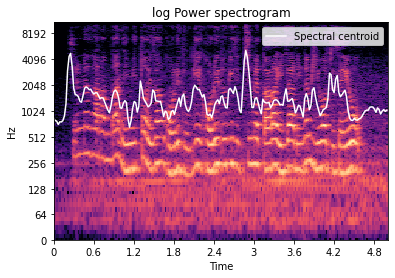

In [7]:
# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
# cent1 = librosa.feature.spectral_centroid(y=y, sr=sr)
# print("y : ", y)
# print("sr : ", sr)
# print("y길이 : ", len(y))
# print("Sampling rate (KHz) : %d" % sr)                  
# print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
# print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)

print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent2.shape)

# [3] bin center frequencies
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
cent3 = librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)

# Graph

times = librosa.times_like(cent2)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent2.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram')]

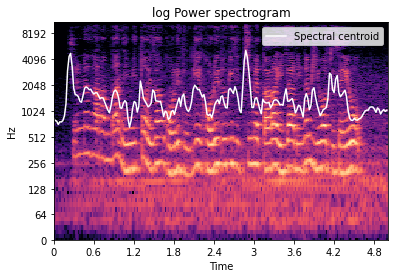

In [8]:
# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
# cent1 = librosa.feature.spectral_centroid(y=y, sr=sr)
# print("y : ", y)
# print("sr : ", sr)
# print("y길이 : ", len(y))
# print("Sampling rate (KHz) : %d" % sr)                  
# print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
# print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)


# [3] bin center frequencies
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
cent3 = librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)

print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent3.shape)
# Graph

times = librosa.times_like(cent3)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent3.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

# hop_length

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 862)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram(hop_length = 128)')]

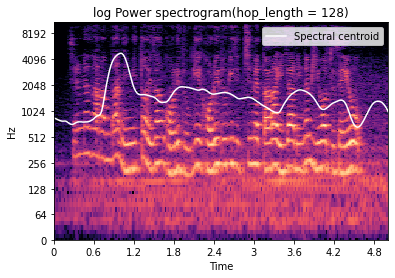

In [6]:
# hop_length = 128

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
cent1 = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length = 128)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)

# Graph

times = librosa.times_like(cent1)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent1.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram(hop_length = 128)')

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 108)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram(hop_length = 1024)')]

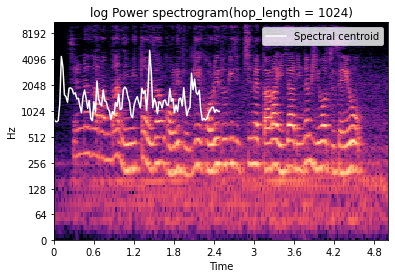

In [15]:
# hop_length = 1024

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
cent1 = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length = 1024)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)

# Graph

times = librosa.times_like(cent1)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent1.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram(hop_length = 1024)')

# n_fft


y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram(n_fft =512)')]

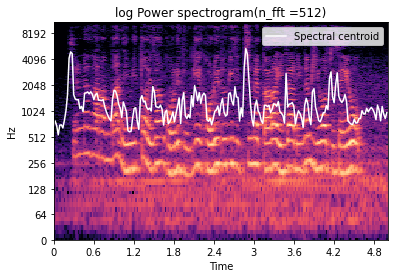

In [17]:
# n_fft =512

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
cent1 = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft =512)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)

# Graph

times = librosa.times_like(cent1)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent1.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram(n_fft =512)')

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram(n_fft = 256)')]

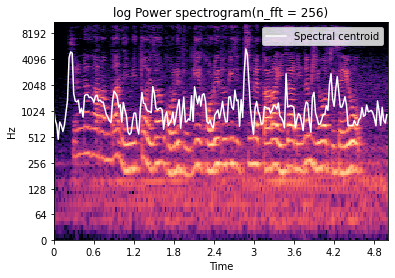

In [18]:
# n_fft = 256

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
cent1 = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft = 256)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)

# Graph

times = librosa.times_like(cent1)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent1.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram(n_fft = 256)')

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram(n_fft = 128)')]

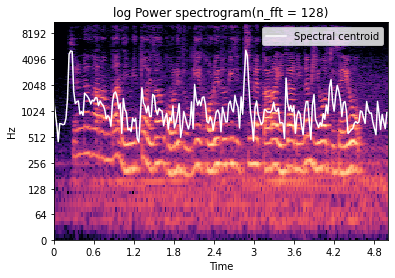

In [21]:
# n_fft = 128

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
cent1 = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft = 128)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)

# Graph

times = librosa.times_like(cent1)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent1.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram(n_fft = 128)')

In [23]:
# n_fft = 1024

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
cent1 = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft = 1024)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)

# Graph

times = librosa.times_like(cent1)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent1.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram(n_fft = 1024)')

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram(n_fft = 1024)')]

In [24]:
# n_fft = 4096

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
cent1 = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft = 4096)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)

# Graph

times = librosa.times_like(cent1)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent1.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram(n_fft = 4096)')

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram(n_fft = 4096)')]

-------------------

# 그 외 파라미터 튜닝

# win_length

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram(win_length=512)')]

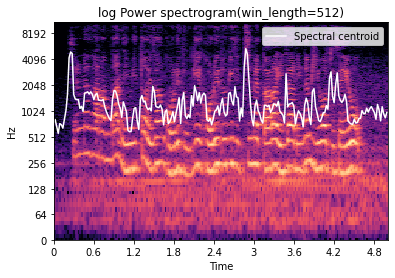

In [26]:
# win_length = 512

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
cent1 = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft = 2048, win_length=512)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)

# Graph

times = librosa.times_like(cent1)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent1.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram(win_length=512)')

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram(win_length=256)')]

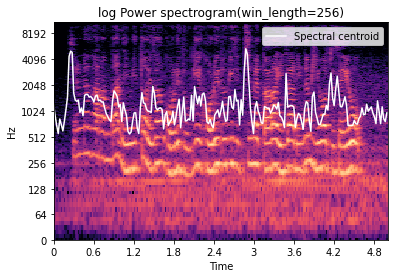

In [27]:
# win_length = 256

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
cent1 = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft = 2048, win_length=256)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)

# Graph

times = librosa.times_like(cent1)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent1.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram(win_length=256)')

# center

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 212)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram(center = False)')]

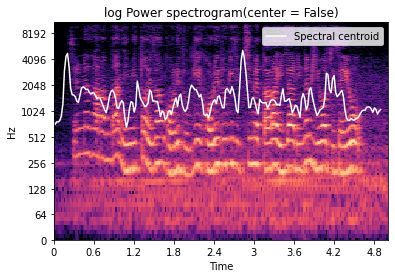

In [32]:
# center = False

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
cent1 = librosa.feature.spectral_centroid(y=y, sr=sr, center = False)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)

# Graph

times = librosa.times_like(cent1)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent1.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram(center = False)')

# pad_mode

In [34]:
# pad_mode = maximum

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
cent1 = librosa.feature.spectral_centroid(y=y, sr=sr, pad_mode = 'maximum')
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", cent1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
cent2 = librosa.feature.spectral_centroid(S=S)

# Graph

times = librosa.times_like(cent1)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent1.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram(pad_mode = maximum)')

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old nam

[Text(0.5, 1.0, 'log Power spectrogram(pad_mode = maximum)')]